# 🔍 Sentiment Analysis on Amazon Reviews
Huấn luyện mô hình phân tích quan điểm (positive/negative) từ dữ liệu đánh giá Amazon.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib


In [2]:
# Đọc dữ liệu train.csv (chứa cột: label, title, text)
df = pd.read_csv('../data/combined_data.csv', encoding='utf-8')

# Hiển thị 5 dòng đầu
df.head()


,content,label
0,Stuning even for the non-gamer This sound trac...,1
1,The best soundtrack ever to anything. I'm read...,1
2,Amazing! This soundtrack is my favorite music ...,1
3,Excellent Soundtrack I truly like this soundtr...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


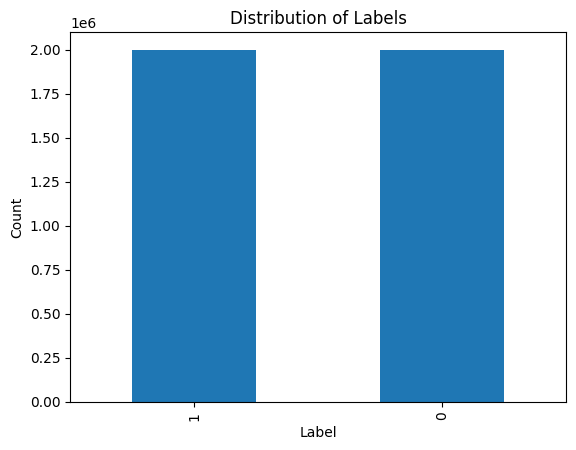

label
1    2000000
0    2000000
Name: count, dtype: int64

In [4]:
# Kiểm tra cân bằng dữ liệu bằng biểu đồ
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

df['label'].value_counts()

In [5]:
X = df['content']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [8]:
y_pred = model.predict(X_test_vec)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))



Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91    400000
    Positive       0.91      0.91      0.91    400000

    accuracy                           0.91    800000
   macro avg       0.91      0.91      0.91    800000
weighted avg       0.91      0.91      0.91    800000



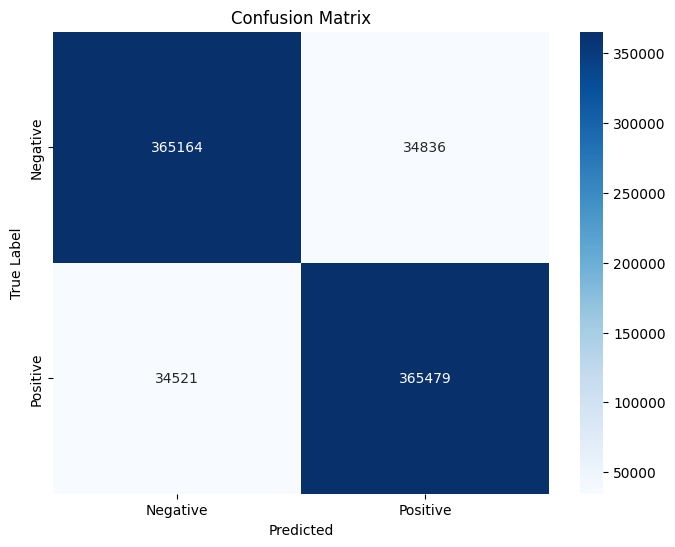

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

In [8]:
joblib.dump(model, '../model/lr_model.pkl')
joblib.dump(vectorizer, '../model/lr_vectorizer.pkl')
print("✅ Đã lưu mô hình và vectorizer vào thư mục model/")


✅ Đã lưu mô hình và vectorizer vào thư mục model/
